# Aprendizado Supervisionado
## Classificação com KNN (K-vizinhos mais próximos)
### Dataset IRIS
Temos um conjunto de dados rotulados e queremos construir um conjunto de dados que receba dados não rotulados como entrada e produza uma rotulação


In [198]:
# Importando as bibliotecas

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [199]:
# Carregando os dados
iris = datasets.load_iris()

### Análise Exploratória de Dados (EDA)

### EDA Numérica

In [200]:
# Analisando o dataset
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [201]:
# Diferentes classes 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [202]:
# Nomes das diferentes classes
iris.target_names

# setosa = 0 
# versicolor = 1
# virginica = 2 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [203]:
# feature_names = variaveis preditoras = características
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [204]:
# Tamanho do dataset, linhas e colunas 
iris.data.shape

(150, 4)

In [205]:
# Transformando os dados em DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [206]:
# Traduzir os codigos das classes aplicando os nomes das especies 
iris_df["target_names"] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Visual EDA

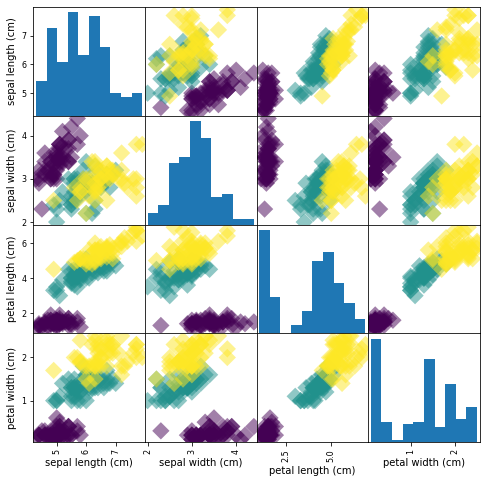

In [207]:
# Visualizando em plot
X = iris_df.drop(columns="target_names")
y = iris["target"]

visual = pd.plotting.scatter_matrix(iris_df, c=y, figsize=[8,8], s=150, marker="D")

### Treinamento e Teste

In [208]:
# Criando matrizes x e y para os recursos e variavel de destino
# Se necessario usar .drop para remover variaveis de destino
# Se necessario usar .values para garantir que x e y sejam matrizes numpy


X = iris_df.drop(columns="target_names")
y = iris["target"]

# Dividindo os dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                        random_state=13)


### KNN
A ideia do K-vizinhos mais proximos, ou KNN é prever o rótulo de qualquer ponto de dados olhando para K.
Exemplo: 3 pontos de dados rotulados mais proximos e fazendo com que votem em qual rótulo o ponto nao rotulado deve ter

In [209]:
# Definindo o número de vizinhos 
knn = KNeighborsClassifier(n_neighbors=10)

# Ajustando o classificador
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

### Prevendo a classificação de dados de teste

In [210]:
# Realizar as previsões sobre os dados de teste 
y_pred = knn.predict(X_test)

# Mostrando as previsões de
y_pred

array([1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2])

In [211]:
# Verificando a precisão do modelo, usando o método de pontuação do modelo e passamos os testes X e y
knn.score(X_test, y_test)

0.9333333333333333

In [212]:
# Acuracia de 93% = macro avg 0.93
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.80      1.00      0.89        12
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



### Prevendo a classificação de dados nao rotulados

In [213]:
# Dados rotulados, novos e que não possui no dataset
X_new = np.array([[5.6,2.8,3.9,1.1],
                  [5.7,2.6,3.8,1.3],
                  [4.7,3.2,1.3,0.2]])

# Realizar as previsões sobre os dados de teste 
prediction = knn.predict(X_new)

'Previsao: {}'.format(prediction)

# 1 = versicolor
# 0 = setosa

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Previsao: [1 1 0]'

###  Pontuação de precisão do KNN selecionado

In [214]:
# Configurando os arrays para armazenar as precisões de treinamento e teste
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [215]:
# Loop sobre difernetes valores de k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


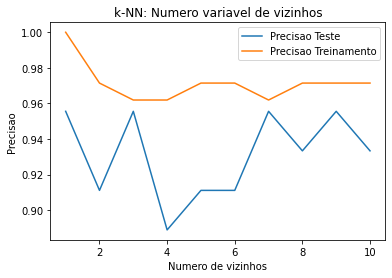

In [216]:
# Gerando o plot
plt.title('k-NN: Numero variavel de vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Precisao Teste')
plt.plot(neighbors, train_accuracy, label = 'Precisao Treinamento')
plt.legend()
plt.xlabel('Numero de vizinhos')
plt.ylabel('Precisao')
plt.show()
